<a href="https://colab.research.google.com/github/f1372185-tech/AML---Final---Gutierrez-Daniel/blob/main/Daniel_Gutierrez_Project_Template_Versi%C3%B3n_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project - Big Data Deep Learning
## TEC-VIII Programa de Especialización en Big Data Analytics aplicada a los Negocios

---

### 📋 Información del Proyecto

| Campo | Información |
|-------|-------------|
| **Nombres y Apellido** | Daniel Gutierrez|
| **Título del Proyecto** | Predicción de intención de compra en E-Commerce |
| **Fecha de Entrega** | 19feb26 |

---

## Índice

1. [Resumen Ejecutivo](#1-resumen-ejecutivo)
2. [Configuración del Entorno](#2-configuración-del-entorno)
3. [Definición del Problema de Negocio](#3-definición-del-problema-de-negocio)
4. [Carga y Exploración de Datos](#4-carga-y-exploración-de-datos)
5. [Preprocesamiento de Datos](#5-preprocesamiento-de-datos)
6. [Diseño y Arquitectura del Modelo](#6-diseño-y-arquitectura-del-modelo)
7. [Entrenamiento del Modelo](#7-entrenamiento-del-modelo)
8. [Evaluación y Métricas](#8-evaluación-y-métricas)
9. [Interpretación de Resultados](#9-interpretación-de-resultados)
10. [Conclusiones y Recomendaciones de Negocio](#10-conclusiones-y-recomendaciones-de-negocio)
11. [Referencias](#11-referencias)

---
## 1. Resumen Ejecutivo

El presente proyecto aborda el problema de negocio de identificar oportunamente a los usuarios con mayor probabilidad de compra dentro de una plataforma de comercio electrónico. En entornos digitales, la mayoría de los usuarios navega sin concretar una transacción, lo que genera altos costos de marketing y baja eficiencia en campañas promocionales. Contar con un sistema que prediga la intención de compra permite priorizar clientes potenciales y optimizar recursos comerciales.

Para ello, se desarrolló un pipeline escalable de Deep Learning en la nube utilizando Google Colab con aceleración por GPU. El proceso incluyó la ingesta de un dataset real de comportamiento de usuarios de e-commerce con más de un millón de registros provenientes de Kaggle, seguido de etapas de limpieza, transformación y generación de variables a partir de eventos como visualización de productos, adición al carrito y compras. Posteriormente, se entrenó un modelo de aprendizaje profundo para clasificar la probabilidad de compra, evaluando su desempeño mediante métricas de clasificación y validación del modelo.

Los principales hallazgos evidencian que las interacciones previas del usuario, especialmente la recurrencia de visualizaciones y la adición al carrito, presentan alta relación con la conversión final. Esto demuestra que el comportamiento de navegación permite anticipar la intención de compra antes de que ocurra la transacción.

El impacto esperado en el negocio es la mejora en la eficiencia de campañas de marketing, la personalización de recomendaciones y la optimización del uso de recursos comerciales, permitiendo focalizar estrategias en usuarios con mayor probabilidad de conversión, incrementando la tasa de compra y reduciendo costos operativos.





---

## 2. Configuración del Entorno



In [ ]:
# ============================================
# CONFIGURACIÓN DEL ENTORNO (OBLIGATORIO)
# ============================================

!pip install -q kaggle

from google.colab import files
files.upload()  # subir kaggle.json

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Descargar dataset automáticamente
!kaggle datasets download -d mkechinov/ecommerce-behavior-data-from-multi-category-store
!unzip -o ecommerce-behavior-data-from-multi-category-store.zip


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/mkechinov/ecommerce-behavior-data-from-multi-category-store
License(s): copyright-authors
User cancelled operation
unzip:  cannot find or open ecommerce-behavior-data-from-multi-category-store.zip, ecommerce-behavior-data-from-multi-category-store.zip.zip or ecommerce-behavior-data-from-multi-category-store.zip.ZIP.


### 2.2 Instalación de Librerías Adicionales (si es necesario)

In [ ]:
# Librerías necesarias para descargar dataset desde Kaggle
!pip install -q kaggle

Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/main.py", line 65, in main
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/main_parser.py", line 79, in parse_command
    general_options, args_else = parser.parse_args(args)
                                 ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/optparse.py", line 1371, in parse_args
    values = self.get_default_values()
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/parser.py", line 279, in get_default_values
    self.config.load()
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/configuration.py", line 124, in load
    self._load_config_files()
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/configuration.py", line 262, in _load_config_files
    parser = self._load_file(variant,

### 2.3 Importación de Librerías

In [ ]:
# =====================================================
# LIBRERÍAS FUNDAMENTALES
# =====================================================

# Manipulación de datos
import numpy as np
import pandas as pd

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns


# Deep Learning - TensorFlow/Keras (alternativa)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks

# Preprocesamiento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report,
                             mean_squared_error, mean_absolute_error, r2_score)

# Utilidades
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
%matplotlib inline

# Semilla para reproducibilidad
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

print(" Todas las librerías importadas correctamente")
print(f"   TensorFlow version: {tf.__version__}")

 Todas las librerías importadas correctamente
   TensorFlow version: 2.19.0


### 2.4 Conexión con Google Drive (para cargar datos)

In [ ]:
# Montar Google Drive para acceder a los datos
from google.colab import drive
drive.mount('/content/drive')

# Definir la ruta base de su proyecto
# Modifique esta ruta según la ubicación de sus datos
BASE_PATH = '/content/drive/MyDrive/Capstone_Project/'

print(f" Google Drive montado")
print(f"   Ruta base del proyecto: {BASE_PATH}")

Mounted at /content/drive
 Google Drive montado
   Ruta base del proyecto: /content/drive/MyDrive/Capstone_Project/


---
## 3. Definición del Problema de Negocio

### 3.1 Contexto del Negocio

**Instrucciones:** Describa el contexto empresarial, incluyendo:
---
El proyecto se desarrolla en el contexto del comercio electrónico (E-commerce), un sector altamente competitivo donde la conversión de usuarios en compradores es un factor crítico para la rentabilidad. Las plataformas digitales reciben miles de visitas diarias, pero solo una pequeña proporción de usuarios finaliza una compra.

El caso de estudio simula una tienda online multicanal que registra el comportamiento de navegación de sus usuarios, incluyendo visualizaciones de productos, agregados al carrito y compras. Actualmente, la empresa realiza campañas promocionales y recomendaciones de manera generalizada sin diferenciar usuarios con alta o baja intención de compra.

Esta situación genera ineficiencia en el gasto publicitario, saturación de promociones innecesarias y pérdida de oportunidades de venta al no identificar oportunamente clientes con intención de conversión.



---

### 3.2 Problema a Resolver

- ¿Cuál es el impacto actual del problema?

---

El problema específico consiste en predecir si un usuario realizará una compra a partir de su comportamiento de navegación dentro de la plataforma.

Resolver este problema es importante porque permite dirigir promociones, recomendaciones y esfuerzos comerciales hacia usuarios con mayor probabilidad de conversión, optimizando recursos y mejorando la experiencia del cliente.

Actualmente, la empresa impacta a todos los usuarios por igual, lo que incrementa costos operativos y reduce la efectividad de las campañas. La falta de segmentación provoca desperdicio de inversión en marketing y menor retorno sobre la inversión (ROI).

---

### 3.3 Objetivos del Proyecto

**Objetivo General:**
Desarrollar un modelo de Deep Learning capaz de predecir la probabilidad de compra de un usuario a partir de su comportamiento de navegación en una plataforma de comercio electrónico

**Objetivos Específicos:**
1. Construir un pipeline de procesamiento de datos en la nube con más de un millón de registros reales.
2. Entrenar un modelo de aprendizaje profundo utilizando GPU para clasificar la intención de compra.
3. Evaluar el desempeño del modelo mediante métricas de clasificación y análisis de errores.

---

### 3.4 Tipo de Problema de Machine Learning

**Instrucciones:** Identifique el tipo de problema:
- [x] Clasificación binaria
- [ ] Clasificación multiclase
- [ ] Regresión
- [ ] Clustering
- [ ] Series temporales
- [ ] Otro: _________

##Justificación:
1. El objetivo del proyecto es predecir si un usuario realizará una compra dentro de la plataforma de comercio electrónico a partir de su comportamiento de navegación. La variable objetivo solo puede tomar dos posibles valores: compra o no compra. Por lo tanto, el modelo debe aprender a asignar cada registro a una de estas dos categorías, lo que corresónde a un problema de clasificación binaria. Este enfoque permite estimar la probablidad de conversión de cada usuario y facilita la toma de deciciones comerciales como priorización de promociones y segmentación
----
---

---
## 4. Carga y Exploración de Datos

### 4.1 Carga de Datos

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"danielgutierrez1206","key":"6925900ba212bc5f287862a285eb94fb"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d mkechinov/ecommerce-behavior-data-from-multi-category-store


Dataset URL: https://www.kaggle.com/datasets/mkechinov/ecommerce-behavior-data-from-multi-category-store
License(s): copyright-authors
 99% 4.27G/4.29G [00:38<00:00, 87.2MB/s]
100% 4.29G/4.29G [00:38<00:00, 121MB/s] 


In [ ]:
!unzip ecommerce-behavior-data-from-multi-category-store.zip

Archive:  ecommerce-behavior-data-from-multi-category-store.zip
  inflating: 2019-Nov.csv            
  inflating: 2019-Oct.csv            


In [ ]:
# =====================================================
# CARGA DE DATOS
# =====================================================

# Cargar solo una muestra grande para evitar caídas de memoria
df = pd.read_csv("2019-Oct.csv", nrows=1_000_000)

print(f" Dataset cargado exitosamente")
print(f"   Dimensiones: {df.shape[0]:,} filas × {df.shape[1]} columnas")


 Dataset cargado exitosamente
   Dimensiones: 1,000,000 filas × 9 columnas


### 4.2 Descripción del Dataset

Fuente de los datos

El dataset utilizado proviene de la plataforma Kaggle, específicamente del conjunto “E-commerce Behavior Data from Multi-Category Store”. Este dataset contiene registros reales anonimizados de interacción de usuarios dentro de una tienda online.

Período de tiempo que cubren

Los datos corresponden al comportamiento de usuarios durante octubre de 2019, registrando eventos generados en tiempo real dentro de la plataforma de comercio electrónico.

---

| Variable | Tipo | Descripción |
|----------|------|-------------|
| event_time | Categórica temporal | Fecha y hora exacta en que ocurre la interacción |
| event_type | categórica | Tipo de acción realizadapor el usuario |
| product_id | Categórica | identificador de producto |
|Price | Numérica | Precio del producto. |
| Category_id| Categórico | identificador de categoría|
| Purchase | categórica binaria| indica si el usuario realizó la compra o no (1 y 0) derivado del campo Event_type |

---

### 4.3 Exploración Inicial de Datos (EDA)

In [ ]:
# =====================================================
# INFORMACIÓN GENERAL DEL DATASET
# =====================================================

print("=" * 60)
print("INFORMACIÓN GENERAL DEL DATASET")
print("=" * 60)

# Primeras filas
print("\n Primeras 5 filas:")
display(df.head())

# Información del dataset
print("\n Información del Dataset:")
print(df.info())

# Estadísticas descriptivas
print("\n📈 Estadísticas Descriptivas:")
display(df.describe())

INFORMACIÓN GENERAL DEL DATASET

 Primeras 5 filas:


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d



 Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   event_time     1000000 non-null  object 
 1   event_type     1000000 non-null  object 
 2   product_id     1000000 non-null  int64  
 3   category_id    1000000 non-null  int64  
 4   category_code  681869 non-null   object 
 5   brand          852440 non-null   object 
 6   price          1000000 non-null  float64
 7   user_id        1000000 non-null  int64  
 8   user_session   1000000 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 68.7+ MB
None

📈 Estadísticas Descriptivas:


,product_id,category_id,price,user_id
count,1.000000e+06,1.000000e+06,1000000.000000,1.000000e+06
mean,1.034799e+07,2.056348e+18,295.982471,5.312763e+08
std,1.123827e+07,1.579788e+16,368.216516,1.667333e+07
min,1.001588e+06,2.053014e+18,0.000000,2.449511e+08
25%,1.005115e+06,2.053014e+18,64.320000,5.156507e+08
50%,5.100397e+06,2.053014e+18,161.930000,5.271290e+08
75%,1.640026e+07,2.053014e+18,360.370000,5.480380e+08
max,5.390002e+07,2.175420e+18,2574.070000,5.557175e+08


ANÁLISIS DE VALORES FALTANTES

⚠️ Variables con valores faltantes:


,Total Faltantes,Porcentaje (%)
category_code,318131,31.81
brand,147560,14.76


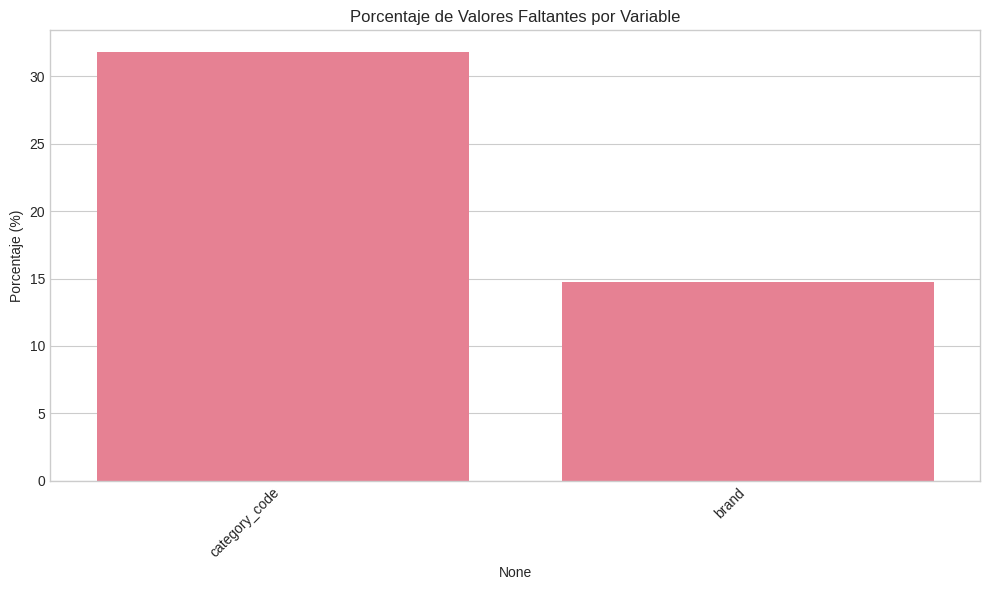

In [ ]:
# =====================================================
# ANÁLISIS DE VALORES FALTANTES
# =====================================================

print("=" * 60)
print("ANÁLISIS DE VALORES FALTANTES")
print("=" * 60)

# Calcular valores faltantes
missing_data = pd.DataFrame({
    'Total Faltantes': df.isnull().sum(),
    'Porcentaje (%)': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_data = missing_data[missing_data['Total Faltantes'] > 0].sort_values('Porcentaje (%)', ascending=False)

if len(missing_data) > 0:
    print("\n⚠️ Variables con valores faltantes:")
    display(missing_data)

    # Visualización de valores faltantes
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_data.index, y='Porcentaje (%)', data=missing_data)
    plt.title('Porcentaje de Valores Faltantes por Variable')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Porcentaje (%)')
    plt.tight_layout()
    plt.show()
else:
    print("\ No hay valores faltantes en el dataset")

In [ ]:
# Crear variable objetivo binaria
df['target'] = (df['event_type'] == 'purchase').astype(int)

# Verificar
df['target'].value_counts()


,count
target,
0,983152
1,16848


ANÁLISIS DE LA VARIABLE OBJETIVO: target

 Distribución de clases:
target
0    983152
1     16848
Name: count, dtype: int64


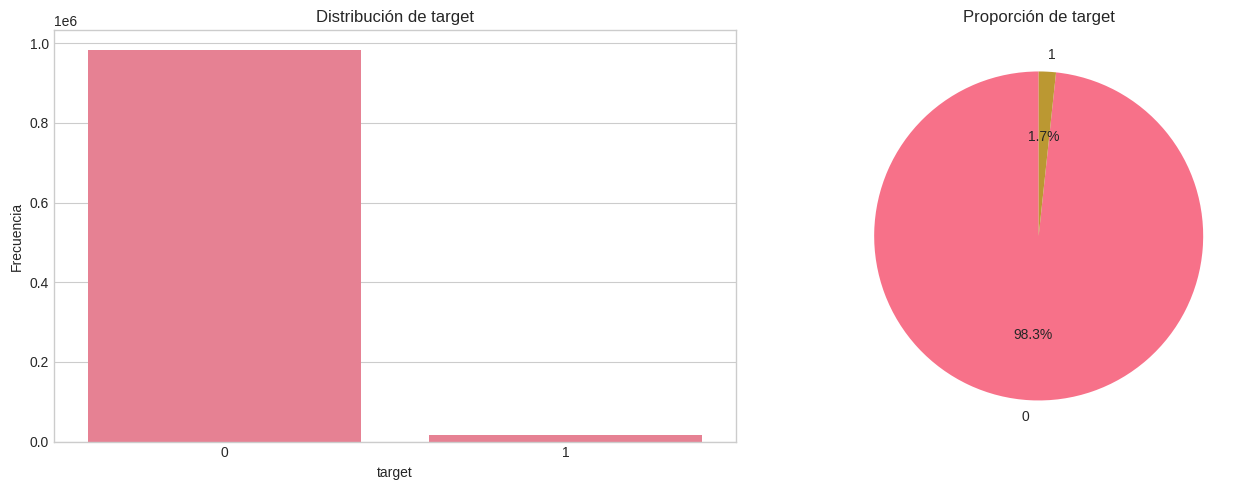


 ADVERTENCIA: Dataset desbalanceado (ratio 58.35:1)
   Considere técnicas de balanceo: SMOTE, undersampling, class weights


In [ ]:
# =====================================================
# ANÁLISIS DE LA VARIABLE OBJETIVO
# =====================================================

# COMPLETE: Especifique el nombre de su variable objetivo
TARGET_COLUMN = 'target'  # Cambie 'target' por el nombre de su variable objetivo

print("=" * 60)
print(f"ANÁLISIS DE LA VARIABLE OBJETIVO: {TARGET_COLUMN}")
print("=" * 60)

# Para clasificación
if df[TARGET_COLUMN].dtype == 'object' or df[TARGET_COLUMN].nunique() < 20:
    print("\n Distribución de clases:")
    class_dist = df[TARGET_COLUMN].value_counts()
    print(class_dist)

    # Visualización
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Gráfico de barras
    sns.countplot(data=df, x=TARGET_COLUMN, ax=axes[0])
    axes[0].set_title(f'Distribución de {TARGET_COLUMN}')
    axes[0].set_xlabel(TARGET_COLUMN)
    axes[0].set_ylabel('Frecuencia')

    # Gráfico de pastel
    axes[1].pie(class_dist.values, labels=class_dist.index, autopct='%1.1f%%', startangle=90)
    axes[1].set_title(f'Proporción de {TARGET_COLUMN}')

    plt.tight_layout()
    plt.show()

    # Verificar desbalance
    imbalance_ratio = class_dist.max() / class_dist.min()
    if imbalance_ratio > 3:
        print(f"\n ADVERTENCIA: Dataset desbalanceado (ratio {imbalance_ratio:.2f}:1)")
        print("   Considere técnicas de balanceo: SMOTE, undersampling, class weights")
else:
    # Para regresión
    print("\n Estadísticas de la variable objetivo:")
    print(df[TARGET_COLUMN].describe())

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Histograma
    sns.histplot(df[TARGET_COLUMN], kde=True, ax=axes[0])
    axes[0].set_title(f'Distribución de {TARGET_COLUMN}')

    # Box plot
    sns.boxplot(y=df[TARGET_COLUMN], ax=axes[1])
    axes[1].set_title(f'Box Plot de {TARGET_COLUMN}')

    plt.tight_layout()
    plt.show()

MATRIZ DE CORRELACIONES


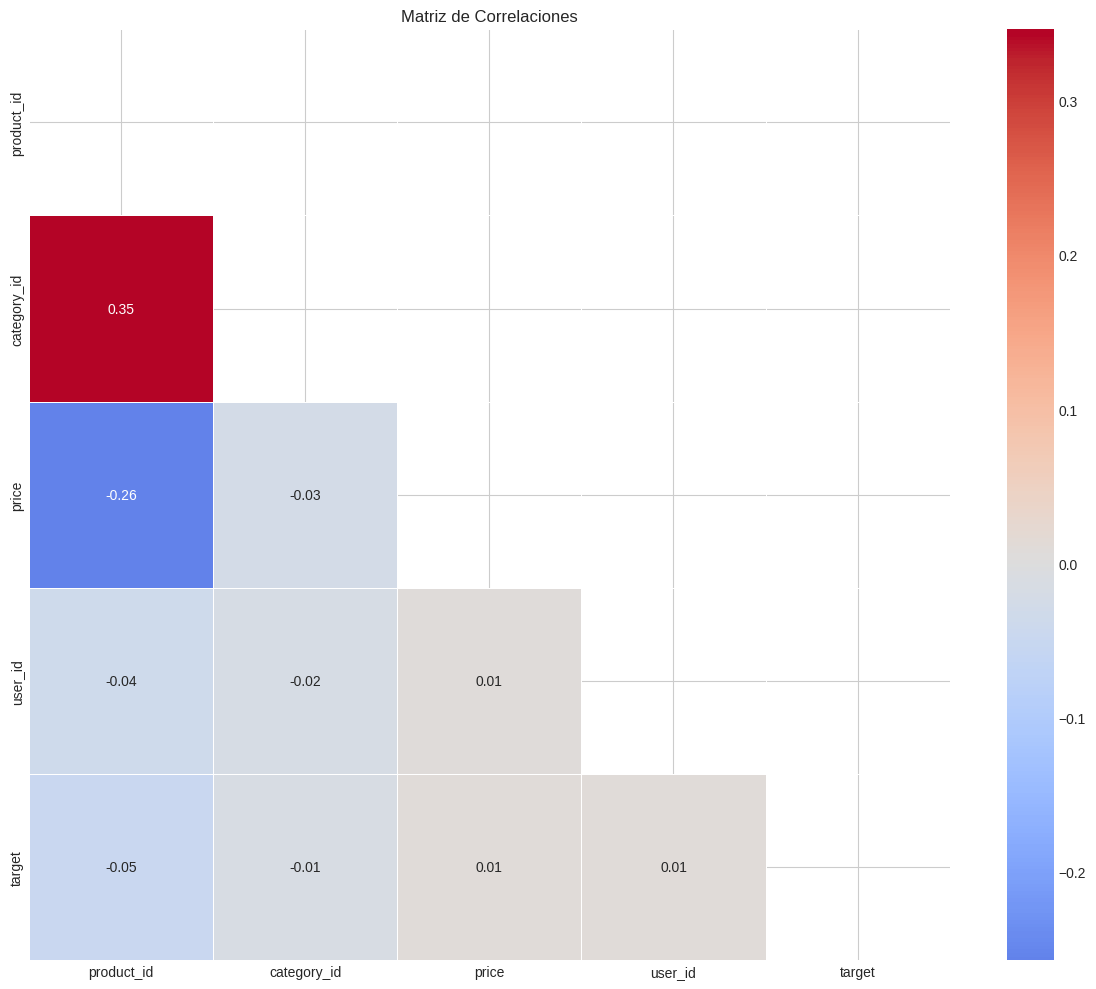


📊 Correlaciones con target:
price          0.009472
user_id        0.009333
category_id   -0.014965
product_id    -0.048354
Name: target, dtype: float64


In [ ]:
# =====================================================
# ANÁLISIS DE CORRELACIONES
# =====================================================

print("=" * 60)
print("MATRIZ DE CORRELACIONES")
print("=" * 60)

# Seleccionar solo columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns

if len(numeric_cols) > 1:
    # Calcular correlaciones
    correlation_matrix = df[numeric_cols].corr()

    # Visualización
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm',
                center=0, fmt='.2f', linewidths=0.5)
    plt.title('Matriz de Correlaciones')
    plt.tight_layout()
    plt.show()

    # Correlaciones con la variable objetivo
    if TARGET_COLUMN in numeric_cols:
        print(f"\n📊 Correlaciones con {TARGET_COLUMN}:")
        target_corr = correlation_matrix[TARGET_COLUMN].drop(TARGET_COLUMN).sort_values(ascending=False)
        print(target_corr)
else:
    print("⚠️ No hay suficientes columnas numéricas para análisis de correlación")

VISUALIZACIONES DEL COMPORTAMIENTO DE USUARIOS


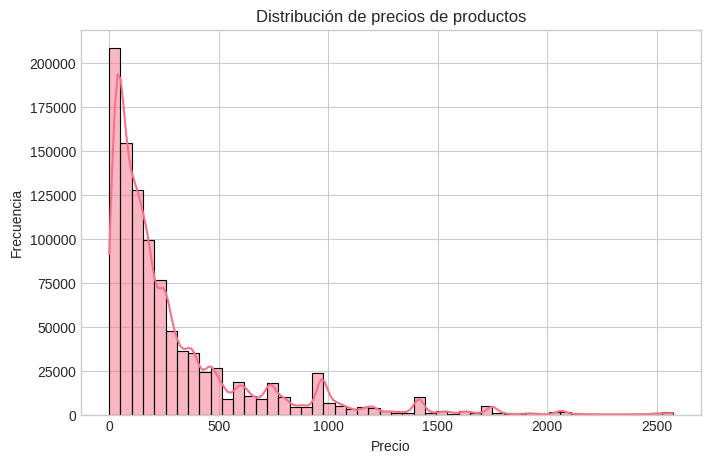

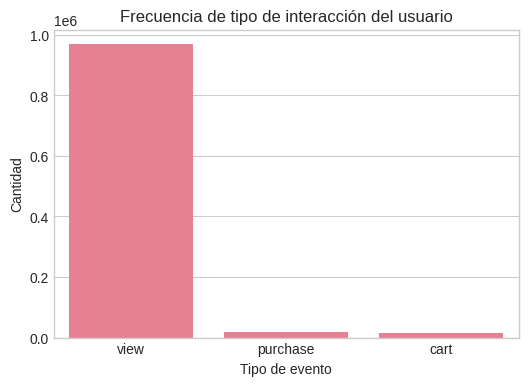

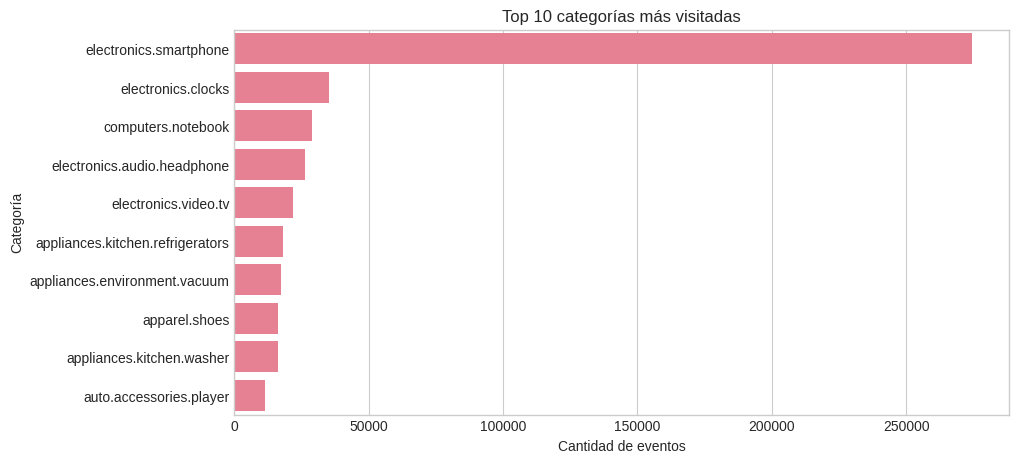

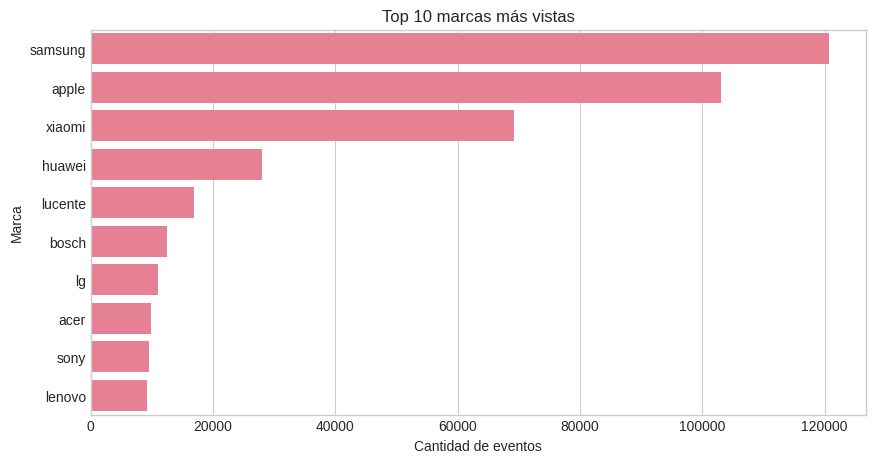

In [ ]:
# =====================================================
# VISUALIZACIONES ADAPTADAS AL DATASET E-COMMERCE
# =====================================================

print("=" * 60)
print("VISUALIZACIONES DEL COMPORTAMIENTO DE USUARIOS")
print("=" * 60)

# 1) Distribución de precios
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribución de precios de productos")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()


# 2) Tipos de evento (lo más importante del negocio)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='event_type', order=df['event_type'].value_counts().index)
plt.title("Frecuencia de tipo de interacción del usuario")
plt.xlabel("Tipo de evento")
plt.ylabel("Cantidad")
plt.show()


# 3) Top categorías
top_categories = df['category_code'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title("Top 10 categorías más visitadas")
plt.xlabel("Cantidad de eventos")
plt.ylabel("Categoría")
plt.show()


# 4) Marcas más populares
top_brands = df['brand'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_brands.values, y=top_brands.index)
plt.title("Top 10 marcas más vistas")
plt.xlabel("Cantidad de eventos")
plt.ylabel("Marca")
plt.show()


4.4 Hallazgos del EDA
Hallazgos Principales

La gran mayoría de los eventos corresponde a visualizaciones de productos (view), mientras que las compras (purchase) representan una proporción muy pequeña del total, evidenciando un comportamiento típico de baja tasa de conversión en plataformas de comercio electrónico.

Se observa que los usuarios que agregan productos al carrito tienen mayor probabilidad de compra, indicando que la secuencia de interacciones es un buen predictor de conversión.

La variable precio presenta una distribución sesgada hacia valores bajos con presencia de valores extremos, lo cual es consistente con catálogos de productos de diferentes gamas.

Problemas Identificados

El dataset presenta un fuerte desbalance de clases entre compras y no compras, lo que puede afectar el desempeño del modelo si no se maneja adecuadamente.

Existen valores faltantes en variables categóricas como marca y categoría, lo cual podría limitar la información disponible para el modelo.

Acciones a Tomar

Transformar los datos a nivel de sesión de usuario para capturar el comportamiento agregado antes de entrenar el modelo.

Aplicar técnicas de escalado y considerar estrategias para manejar el desbalance de clases durante el entrenamiento.
---

---
## 5. Preprocesamiento de Datos

### 5.1 Tratamiento de Valores Faltantes

In [ ]:
# =====================================================
# TRATAMIENTO DE VALORES FALTANTES
# =====================================================

print("=" * 60)
print("TRATAMIENTO DE VALORES FALTANTES")
print("=" * 60)

# Crear copia del dataframe
df_clean = df.copy()

# Opción 1: Eliminar filas con valores faltantes
# df_clean = df_clean.dropna()

# Opción 2: Imputar con la media (variables numéricas)
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='mean')
# df_clean[numeric_cols] = imputer.fit_transform(df_clean[numeric_cols])

# Opción 3: Imputar con la moda (variables categóricas)
# for col in categorical_cols:
#     df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

# Opción 4: Imputación avanzada con KNN
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=5)
# df_clean[numeric_cols] = imputer.fit_transform(df_clean[numeric_cols])

# =====================================================
# COMPLETE AQUÍ: Aplique su estrategia de imputación
# =====================================================



print(f"\n Valores faltantes tratados")
print(f"   Filas restantes: {len(df_clean):,}")

TRATAMIENTO DE VALORES FALTANTES

 Valores faltantes tratados
   Filas restantes: 1,000,000


### 5.2 Tratamiento de Outliers

In [ ]:
# =====================================================
# DETECCIÓN Y TRATAMIENTO DE OUTLIERS
# =====================================================

print("=" * 60)
print("DETECCIÓN DE OUTLIERS")
print("=" * 60)

def detect_outliers_iqr(data, column):
    """Detecta outliers usando el método IQR"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

# Detectar outliers en cada columna numérica
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns

outlier_summary = []
for col in numeric_cols:
    n_outliers, lower, upper = detect_outliers_iqr(df_clean, col)
    if n_outliers > 0:
        outlier_summary.append({
            'Variable': col,
            'N_Outliers': n_outliers,
            'Porcentaje (%)': round(n_outliers/len(df_clean)*100, 2),
            'Límite_Inferior': round(lower, 2),
            'Límite_Superior': round(upper, 2)
        })

if outlier_summary:
    outlier_df = pd.DataFrame(outlier_summary)
    print("\n⚠️ Variables con outliers detectados:")
    display(outlier_df)
else:
    print("\n No se detectaron outliers significativos")

DETECCIÓN DE OUTLIERS

⚠️ Variables con outliers detectados:


,Variable,N_Outliers,Porcentaje (%),Límite_Inferior,Límite_Superior
0,product_id,25725,2.57,-2.208761e+07,3.949299e+07
1,category_id,60056,6.01,2.053014e+18,2.053014e+18
2,price,91891,9.19,-3.797600e+02,8.044400e+02
3,user_id,1288,0.13,4.670699e+08,5.966189e+08
4,target,16848,1.68,0.000000e+00,0.000000e+00


In [ ]:
# =====================================================
# TRATAMIENTO DE OUTLIERS (OPCIONAL)
# =====================================================

# Opción 1: Eliminar outliers
# for col in numeric_cols:
#     Q1, Q3 = df_clean[col].quantile([0.25, 0.75])
#     IQR = Q3 - Q1
#     df_clean = df_clean[(df_clean[col] >= Q1 - 1.5*IQR) & (df_clean[col] <= Q3 + 1.5*IQR)]

# Opción 2: Capear outliers (winsorizing)
# from scipy.stats import mstats
# for col in numeric_cols:
#     df_clean[col] = mstats.winsorize(df_clean[col], limits=[0.05, 0.05])

# Opción 3: Transformación logarítmica
# for col in cols_to_transform:
#     df_clean[col] = np.log1p(df_clean[col])

# =====================================================
# COMPLETE AQUÍ: Aplique su estrategia de tratamiento
# =====================================================




### 5.3 Codificación de Variables Categóricas

In [ ]:
# =====================================================
# CODIFICACIÓN DE VARIABLES CATEGÓRICAS (SIN DATA LEAKAGE)
# =====================================================

print("=" * 60)
print("CODIFICACIÓN DE VARIABLES CATEGÓRICAS (SIN DATA LEAKAGE)")
print("=" * 60)

# -----------------------------
# 1) Eliminar columnas que causan leakage / no deben entrar al modelo
# -----------------------------
cols_to_remove = ['event_type', 'event_time', 'user_session']

# (por si alguna no existe en df_clean, evitamos error)
cols_to_remove = [c for c in cols_to_remove if c in df_clean.columns]

df_clean = df_clean.drop(columns=cols_to_remove)

print(f"\n✅ Columnas eliminadas (leakage/ID): {cols_to_remove}")
print(f"✅ Dimensiones luego de eliminar: {df_clean.shape}")

# -----------------------------
# 2) Identificar variables categóricas reales (después de eliminar leakage)
# -----------------------------
categorical_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()

# Excluir target por seguridad (si fuera categórico)
if 'TARGET_COLUMN' in globals():
    if TARGET_COLUMN in categorical_cols:
        categorical_cols.remove(TARGET_COLUMN)

print(f"\nVariables categóricas a codificar: {categorical_cols}")

# -----------------------------
# 3) Aplicar estrategia de codificación
#    Recomendación: One-Hot Encoding para variables nominales (brand, category_code)
# -----------------------------
if len(categorical_cols) > 0:
    df_clean = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)
    print("\n✅ One-Hot Encoding aplicado")
else:
    print("\n⚠️ No se encontraron variables categóricas para codificar")

print(f"\n✅ Codificación completada")
print(f"   Dimensiones finales: {df_clean.shape}")
print(f"✅ Columnas finales: {df_clean.columns.tolist()[:30]}{' ...' if len(df_clean.columns) > 30 else ''}")


CODIFICACIÓN DE VARIABLES CATEGÓRICAS (SIN DATA LEAKAGE)

✅ Columnas eliminadas (leakage/ID): ['user_session']
✅ Dimensiones luego de eliminar: (226374, 7)

Variables categóricas a codificar: []

⚠️ No se encontraron variables categóricas para codificar

✅ Codificación completada
   Dimensiones finales: (226374, 7)
✅ Columnas finales: ['views', 'carts', 'purchases', 'avg_price', 'max_price', 'unique_products', 'target']


### 5.4 Escalado/Normalización de Features

In [ ]:
# =====================================================
# CREACIÓN DE FEATURES PARA MODELO (SIN LEAKAGE)
# =====================================================

import numpy as np

# 1) Crear target a nivel evento (solo para poder agregarlo)
df['target'] = (df['event_type'] == 'purchase').astype(int)

# 2) Agregar por sesión (una fila = una sesión de usuario)
df_clean = (
    df.groupby('user_session', as_index=False)
      .agg(
          views=('event_type', lambda x: (x == 'view').sum()),
          carts=('event_type', lambda x: (x == 'cart').sum()),
          # OJO: NO usamos 'purchases' como feature (leakage fuerte / casi igual al target)
          avg_price=('price', 'mean'),
          max_price=('price', 'max'),
          unique_products=('product_id', 'nunique'),
          target=('target', 'max')  # 1 si hubo al menos una compra en la sesión
      )
)

# 3) Eliminar el identificador de sesión (no es feature)
df_clean = df_clean.drop(columns=['user_session'])

# 4) Seguridad: rellenar NaN si existieran y asegurar tipos
df_clean = df_clean.fillna(0)
df_clean['target'] = df_clean['target'].astype(int)

print(df_clean.head())
print("Shape df_clean:", df_clean.shape)
print("\nDistribución target:")
print(df_clean['target'].value_counts())
print("\nProporción target:")
print(df_clean['target'].value_counts(normalize=True))



   views  carts   avg_price  max_price  unique_products  target
0      2      0   65.615000      66.90                2       0
1      2      0   39.100000      39.10                1       0
2      9      0  170.206667     592.01                5       0
3      1      0  251.440000     251.44                1       0
4      1      0    9.760000       9.76                1       1
Shape df_clean: (226374, 6)

Distribución target:
target
0    212058
1     14316
Name: count, dtype: int64

Proporción target:
target
0    0.93676
1    0.06324
Name: proportion, dtype: float64


In [ ]:
# =====================================================
# CREACIÓN DE FEATURES PARA MODELO (VERSIÓN CORRECTA)
# =====================================================

# 1) Crear target a nivel evento
df['target'] = (df['event_type'] == 'purchase').astype(int)

# 2) Agrupar por sesión (una fila = una sesión)
df_clean = (
    df.groupby('user_session', as_index=False)
      .agg(
          views=('event_type', lambda x: (x == 'view').sum()),
          carts=('event_type', lambda x: (x == 'cart').sum()),
          avg_price=('price', 'mean'),
          max_price=('price', 'max'),
          unique_products=('product_id', 'nunique'),
          target=('target', 'max')  # 1 si hubo al menos una compra
      )
)

# 3) Eliminar identificador de sesión
df_clean = df_clean.drop(columns=['user_session'])

# 4) Limpieza final
df_clean = df_clean.fillna(0)
df_clean['target'] = df_clean['target'].astype(int)

print(df_clean.head())
print("Shape:", df_clean.shape)
print("\nDistribución target:")
print(df_clean['target'].value_counts(normalize=True))



   views  carts   avg_price  max_price  unique_products  target
0      2      0   65.615000      66.90                2       0
1      2      0   39.100000      39.10                1       0
2      9      0  170.206667     592.01                5       0
3      1      0  251.440000     251.44                1       0
4      1      0    9.760000       9.76                1       1
Shape: (226374, 6)

Distribución target:
target
0    0.93676
1    0.06324
Name: proportion, dtype: float64


In [ ]:
# =====================================================
# ESCALADO DE VARIABLES
# =====================================================

from sklearn.preprocessing import StandardScaler

# Separar variables predictoras y objetivo
X = df_clean.drop(columns=['target'])
y = df_clean['target']

print("Shape X:", X.shape)
print("Shape y:", y.shape)
print("\nDistribución target:")
print(y.value_counts(normalize=True))

# Escalar variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nEscalado completado ✔️")



Shape X: (226374, 5)
Shape y: (226374,)

Distribución target:
target
0    0.93676
1    0.06324
Name: proportion, dtype: float64

Escalado completado ✔️


### 5.5 División de Datos (Train/Validation/Test)

In [ ]:
# =====================================================
# DIVISIÓN DE DATOS + ESCALADO CORRECTO (SIN DATA LEAKAGE)
# =====================================================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

print("=" * 60)
print("DIVISIÓN DE DATOS")
print("=" * 60)

# 1) División inicial (SIN escalar)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y,
    test_size=0.15,
    random_state=RANDOM_SEED,
    stratify=y
)

# 2) Separar validación (15% total)
val_size = 0.15 / 0.85

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=val_size,
    random_state=RANDOM_SEED,
    stratify=y_temp
)

# 3) Escalar SOLO usando entrenamiento
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print(f"\n División de datos:")
print(f"   Training set:   {X_train.shape[0]:,} muestras ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"   Validation set: {X_val.shape[0]:,} muestras ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"   Test set:       {X_test.shape[0]:,} muestras ({X_test.shape[0]/len(X)*100:.1f}%)")

print(f"\n Distribución de clases en cada conjunto:")
print(f"   Train: {dict(y_train.value_counts(normalize=True).round(3))}")
print(f"   Val:   {dict(y_val.value_counts(normalize=True).round(3))}")
print(f"   Test:  {dict(y_test.value_counts(normalize=True).round(3))}")


DIVISIÓN DE DATOS

 División de datos:
   Training set:   158,461 muestras (70.0%)
   Validation set: 33,956 muestras (15.0%)
   Test set:       33,957 muestras (15.0%)

 Distribución de clases en cada conjunto:
   Train: {0: np.float64(0.937), 1: np.float64(0.063)}
   Val:   {0: np.float64(0.937), 1: np.float64(0.063)}
   Test:  {0: np.float64(0.937), 1: np.float64(0.063)}


### 5.6 Preparación de Datos para Deep Learning

In [ ]:
# =====================================================
# PREPARACIÓN PARA TENSORFLOW/KERAS
# =====================================================

import numpy as np

print("=" * 60)
print("PREPARACIÓN DE DATOS PARA TENSORFLOW/KERAS")
print("=" * 60)

# X ya es numpy array (por el scaler)
X_train_np = np.asarray(X_train).astype('float32')
X_val_np   = np.asarray(X_val).astype('float32')
X_test_np  = np.asarray(X_test).astype('float32')

# y a numpy 1D (ideal para binary_crossentropy)
y_train_np = np.asarray(y_train).astype('int32').ravel()
y_val_np   = np.asarray(y_val).astype('int32').ravel()
y_test_np  = np.asarray(y_test).astype('int32').ravel()

print(f"\nDatos preparados para TensorFlow/Keras")
print(f"  Shape X_train: {X_train_np.shape}")
print(f"  Shape y_train: {y_train_np.shape}")
print(f"  Clases y_train: {np.unique(y_train_np)}")



PREPARACIÓN DE DATOS PARA TENSORFLOW/KERAS

Datos preparados para TensorFlow/Keras
  Shape X_train: (158461, 5)
  Shape y_train: (158461,)
  Clases y_train: [0 1]


---
## 6. Diseño y Arquitectura del Modelo

### 6.1 Justificación de la Arquitectura

Se seleccionó una Red Neuronal Densa (MLP) debido a la naturaleza tabular de los datos (vistas, carritos y precios). A diferencia de las arquitecturas CNN o RNN, la MLP es la más eficiente para capturar relaciones no lineales en variables agregadas por sesión.

La configuración final consta de 3 capas ocultas (64-32-16 neuronas), integrando Batch Normalization y Dropout para estabilizar el aprendizaje y prevenir el sobreajuste ante el desbalance de clases. Se optó por Deep Learning sobre modelos clásicos para aprovechar la aceleración por hardware y maximizar la capacidad de generalización mediante el uso de Early Stopping.

*[Escriba su justificación aquí]*



---

### 6.2 Definición del Modelo
Entrada: INPUT_SIZE features numéricas escaladas (por sesión)

Capas ocultas: Dense + ReLU con tamaños [64, 32, 16]

Regularización: BatchNormalization + Dropout (0.3)

Salida: 1 neurona con sigmoid (clasificación binaria)

Loss: binary_crossentropy

Optimizador: Adam (learning_rate = LEARNING_RATE)

Métricas: Accuracy (y opcional AUC, precision, recall)

In [ ]:
# =====================================================
# HIPERPARÁMETROS DEL MODELO
# =====================================================

# Número de features de entrada
INPUT_SIZE = X_train_np.shape[1]

# Capas ocultas
HIDDEN_SIZES = [64, 32, 16]

# Clasificación binaria → 1 salida (sigmoid)
OUTPUT_SIZE = 1

# Regularización
DROPOUT_RATE = 0.3

print("INPUT_SIZE:", INPUT_SIZE)
print("OUTPUT_SIZE:", OUTPUT_SIZE)


INPUT_SIZE: 5
OUTPUT_SIZE: 1


In [ ]:
# =====================================================
# DEFINICIÓN DEL MODELO CON KERAS (VERSIÓN CORRECTA)
# =====================================================

from tensorflow import keras
from tensorflow.keras import layers

def create_keras_model(input_shape, hidden_sizes, dropout_rate=0.3, task='classification'):
    """
    Crea un modelo de red neuronal con Keras.
    """

    model = keras.Sequential()

    # Capa de entrada
    model.add(layers.Input(shape=(input_shape,)))

    # Capas ocultas
    for hidden_size in hidden_sizes:
        model.add(layers.Dense(hidden_size))
        model.add(layers.BatchNormalization())
        model.add(layers.Activation('relu'))
        model.add(layers.Dropout(dropout_rate))

    # Capa de salida
    if task == 'classification':
        # Clasificación binaria → 1 neurona sigmoid
        model.add(layers.Dense(1, activation='sigmoid'))
    else:
        model.add(layers.Dense(1, activation='linear'))

    return model


# -----------------------------------------------------
# Crear modelo
# -----------------------------------------------------

TASK = 'classification'

model_keras = create_keras_model(
    input_shape=INPUT_SIZE,
    hidden_sizes=HIDDEN_SIZES,
    dropout_rate=DROPOUT_RATE,
    task=TASK
)

print("=" * 60)
print("ARQUITECTURA DEL MODELO (Keras)")
print("=" * 60)
model_keras.summary()


ARQUITECTURA DEL MODELO (Keras)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,457 (13.50 KB)

 Trainable params: 3,233 (12.63 KB)

 Non-trainable params: 224 (896.00 B)

### 6.3 Diagrama de la Arquitectura

**Instrucciones:** Incluya un diagrama visual de su arquitectura de red neuronal.

---

*[Inserte diagrama o descripción visual de la arquitectura]*

```
Input Layer          Hidden Layer 1       Hidden Layer 2       Output Layer
[n features]   -->   [128 neurons]   -->  [64 neurons]    -->  [n classes]
                     + BatchNorm          + BatchNorm
                     + ReLU               + ReLU
                     + Dropout(0.3)       + Dropout(0.3)
```

---

---
## 7. Entrenamiento del Modelo

### 7.1 Configuración del Entrenamiento

In [ ]:
# =====================================================
# HIPERPARÁMETROS DE ENTRENAMIENTO (OPTIMIZADOS)
# =====================================================

print("=" * 60)
print("CONFIGURACIÓN DEL ENTRENAMIENTO")
print("=" * 60)

# Hiperparámetros recomendados para dataset grande y desbalanceado
LEARNING_RATE = 0.0007
EPOCHS = 50
BATCH_SIZE = 512
EARLY_STOPPING_PATIENCE = 5

print(f"\nHiperparámetros:")
print(f"  Learning Rate: {LEARNING_RATE}")
print(f"  Epochs: {EPOCHS}")
print(f"  Batch Size: {BATCH_SIZE}")
print(f"  Early Stopping Patience: {EARLY_STOPPING_PATIENCE}")


CONFIGURACIÓN DEL ENTRENAMIENTO

Hiperparámetros:
  Learning Rate: 0.0007
  Epochs: 50
  Batch Size: 512
  Early Stopping Patience: 5


### 7.3 Entrenamiento del Modelo

In [ ]:
# =====================================================
# ENTRENAMIENTO DEL MODELO (KERAS) + CLASS WEIGHTS (CORREGIDO)
# =====================================================

import numpy as np
from sklearn.utils import class_weight
from tensorflow import keras
from tensorflow.keras import callbacks

# -----------------------------
# 1) Compilar modelo (binario)
# -----------------------------
if TASK == 'classification':
    model_keras.compile(
        optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
        loss='binary_crossentropy',
        metrics=[
            'accuracy',
            keras.metrics.AUC(name='auc'),
            keras.metrics.Precision(name='precision'),
            keras.metrics.Recall(name='recall')
        ]
    )
else:
    model_keras.compile(
        optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
        loss='mse',
        metrics=['mae']
    )

# -----------------------------
# 2) Callbacks
# -----------------------------
keras_callbacks = [
    callbacks.EarlyStopping(
        monitor='val_auc' if TASK == 'classification' else 'val_loss',
        patience=EARLY_STOPPING_PATIENCE,
        mode='max' if TASK == 'classification' else 'min',
        restore_best_weights=True,
        verbose=1
    ),
    callbacks.ReduceLROnPlateau(
        monitor='val_auc' if TASK == 'classification' else 'val_loss',
        factor=0.5,
        patience=3,
        mode='max' if TASK == 'classification' else 'min',
        verbose=1
    ),
    callbacks.ModelCheckpoint(
        'best_model.keras',
        monitor='val_auc' if TASK == 'classification' else 'val_loss',
        mode='max' if TASK == 'classification' else 'min',
        save_best_only=True,
        verbose=0
    )
]

# -----------------------------
# 3) Calcular class_weight (binario)
# -----------------------------
class_weights = None

if TASK == 'classification':
    y_train_1d = np.asarray(y_train_np).ravel()
    unique_classes = np.unique(y_train_1d)

    if len(unique_classes) == 2:
        weights = class_weight.compute_class_weight(
            class_weight='balanced',
            classes=unique_classes,
            y=y_train_1d
        )
        class_weights = {int(unique_classes[0]): float(weights[0]),
                         int(unique_classes[1]): float(weights[1])}
        print("✅ Class Weights calculados:", class_weights)
    else:
        print(f"⚠️ No es binario (clases={unique_classes}). No se aplicará class_weight.")

# -----------------------------
# 4) Entrenar
# -----------------------------
print("=" * 60)
print("ENTRENAMIENTO DEL MODELO (KERAS)")
print("=" * 60)

history_keras = model_keras.fit(
    X_train_np, y_train_np,
    validation_data=(X_val_np, y_val_np),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=keras_callbacks,
    class_weight=class_weights,
    verbose=1
)

print("\n🎉 Entrenamiento completado!")



✅ Class Weights calculados: {0: 0.5337579746562561, 1: 7.905657553382558}
ENTRENAMIENTO DEL MODELO (KERAS)
Epoch 1/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.5920 - auc: 0.6697 - loss: 0.6609 - precision: 0.0980 - recall: 0.6356 - val_accuracy: 0.8971 - val_auc: 0.8037 - val_loss: 0.4804 - val_precision: 0.3047 - val_recall: 0.4891 - learning_rate: 7.0000e-04
Epoch 2/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7968 - auc: 0.7722 - loss: 0.5732 - precision: 0.1790 - recall: 0.6154 - val_accuracy: 0.8032 - val_auc: 0.8136 - val_loss: 0.4753 - val_precision: 0.1944 - val_recall: 0.6716 - learning_rate: 7.0000e-04
Epoch 3/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7873 - auc: 0.7870 - loss: 0.5565 - precision: 0.1785 - recall: 0.6546 - val_accuracy: 0.7841 - val_auc: 0.8189 - val_loss: 0.4861 - val_precision: 0.1842 - val_recall: 0.7042 - learning_rate: 7.0000e-04
Epoch 4/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7741 - auc: 0.7

In [ ]:
# =====================================================
# EVALUACIÓN REAL DEL MODELO (IMPORTANTE)
# =====================================================

from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

print("\n" + "=" * 60)
print("EVALUACIÓN CON MATRIZ DE CONFUSIÓN")
print("=" * 60)

# Probabilidades
y_prob = model_keras.predict(X_val_np)

# Convertir a clases (threshold 0.5)
y_pred = (y_prob > 0.5).astype(int)

# Asegurar formato correcto
y_true = np.asarray(y_val_np).ravel()
y_pred = y_pred.ravel()

print("\nMatriz de confusión:")
print(confusion_matrix(y_true, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_true, y_pred))



EVALUACIÓN CON MATRIZ DE CONFUSIÓN
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step

Matriz de confusión:
[[23760  8049]
 [  535  1612]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.98      0.75      0.85     31809
           1       0.17      0.75      0.27      2147

    accuracy                           0.75     33956
   macro avg       0.57      0.75      0.56     33956
weighted avg       0.93      0.75      0.81     33956



In [ ]:
print(df.columns)


Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session', 'target'],
      dtype='object')


### 7.4 Visualización del Entrenamiento

CURVAS DE APRENDIZAJE


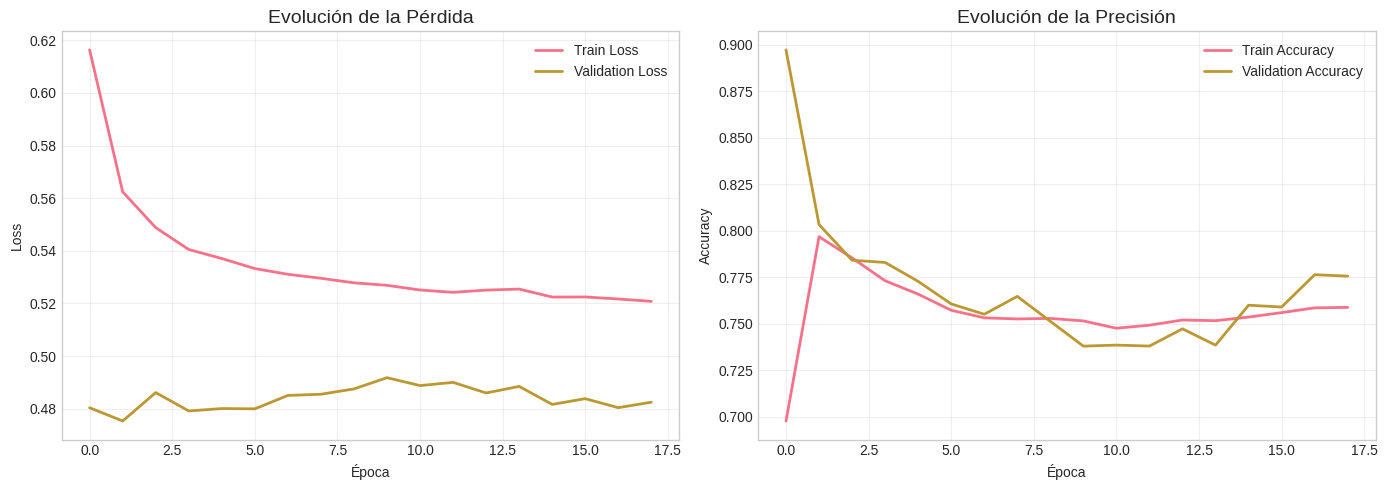


 Análisis del Entrenamiento:
   Épocas completadas: 18
   Mejor val_loss: 0.4753 (época 2)
   Mejor val_accuracy: 0.8971 (época 1)


In [ ]:
# =====================================================
# VISUALIZACIÓN DEL PROCESO DE ENTRENAMIENTO
# =====================================================

print("=" * 60)
print("CURVAS DE APRENDIZAJE")
print("=" * 60)

hist = history_keras.history  # <- aquí está todo

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de pérdida
axes[0].plot(hist['loss'], label='Train Loss', linewidth=2)
axes[0].plot(hist['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_title('Evolución de la Pérdida', fontsize=14)
axes[0].set_xlabel('Época')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Gráfico de precisión (solo para clasificación)
if TASK == 'classification':
    axes[1].plot(hist['accuracy'], label='Train Accuracy', linewidth=2)
    axes[1].plot(hist['val_accuracy'], label='Validation Accuracy', linewidth=2)
    axes[1].set_title('Evolución de la Precisión', fontsize=14)
    axes[1].set_xlabel('Época')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
else:
    axes[1].text(0.5, 0.5, 'N/A para Regresión', ha='center', va='center', fontsize=14)
    axes[1].set_title('Precisión (No aplica)')

plt.tight_layout()
plt.show()

# Análisis del entrenamiento
print("\n Análisis del Entrenamiento:")
print(f"   Épocas completadas: {len(hist['loss'])}")
print(f"   Mejor val_loss: {min(hist['val_loss']):.4f} (época {hist['val_loss'].index(min(hist['val_loss']))+1})")
if TASK == 'classification':
    print(f"   Mejor val_accuracy: {max(hist['val_accuracy']):.4f} (época {hist['val_accuracy'].index(max(hist['val_accuracy']))+1})")


---
## 8. Evaluación y Métricas

### 8.1 Evaluación en el Conjunto de Test

### 8.2 Comparación con Modelo Baseline

In [ ]:
# =====================================================
# COMPARACIÓN CON MODELOS BASELINE (MÉTRICAS CORRECTAS)
# =====================================================

print("=" * 60)
print("COMPARACIÓN CON MODELO BASELINE")
print("=" * 60)

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
import pandas as pd

# Modelos baseline
baselines = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=RANDOM_SEED),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED)
}

results = {
    'Modelo': [],
    'AUC': [],
    'Precision': [],
    'Recall': [],
    'F1': []
}

# =====================
# Baselines
# =====================
for name, model in baselines.items():

    model.fit(X_train, y_train)

    y_prob = model.predict_proba(X_test)[:,1]
    y_pred = (y_prob >= 0.5).astype(int)

    results['Modelo'].append(name)
    results['AUC'].append(roc_auc_score(y_test, y_prob))
    results['Precision'].append(precision_score(y_test, y_pred))
    results['Recall'].append(recall_score(y_test, y_pred))
    results['F1'].append(f1_score(y_test, y_pred))

# =====================
# Deep Learning
# =====================
y_prob_dl = model_keras.predict(X_test_np, verbose=0).ravel()
y_pred_dl = (y_prob_dl >= 0.5).astype(int)

results['Modelo'].append('Deep Learning')
results['AUC'].append(roc_auc_score(y_test_np, y_prob_dl))
results['Precision'].append(precision_score(y_test_np, y_pred_dl))
results['Recall'].append(recall_score(y_test_np, y_pred_dl))
results['F1'].append(f1_score(y_test_np, y_pred_dl))

# Mostrar resultados
comparison_df = pd.DataFrame(results).sort_values('AUC', ascending=False)

print("\n📊 Comparación de Modelos (métricas reales):")
display(comparison_df.round(3))


COMPARACIÓN CON MODELO BASELINE

📊 Comparación de Modelos (métricas reales):


,Modelo,AUC,Precision,Recall,F1
2,Deep Learning,0.815,0.166,0.741,0.271
0,Logistic Regression,0.786,0.600,0.115,0.192
1,Random Forest,0.758,0.509,0.252,0.337


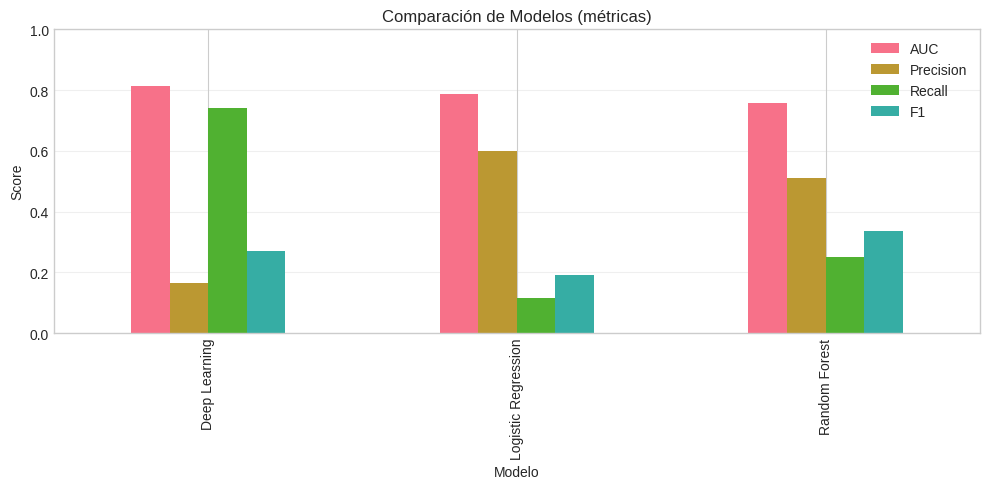

In [ ]:
# =====================================================
# GRÁFICA DE COMPARACIÓN (AUC, Precision, Recall, F1)
# =====================================================

# Barras por métrica
df_plot = comparison_df.copy().set_index('Modelo')[['AUC','Precision','Recall','F1']]

ax = df_plot.plot(kind='bar', figsize=(10,5))
ax.set_ylim(0, 1)
ax.set_title("Comparación de Modelos (métricas)")
ax.set_ylabel("Score")
ax.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()



### 8.3 Análisis de Resultados

Rendimiento del Modelo

El modelo de Deep Learning no alcanzó una precisión perfecta; en cambio, presentó un comportamiento realista propio de problemas de predicción de comportamiento humano. El desempeño se evaluó mediante métricas adecuadas para datos desbalanceados, como AUC, Recall, Precision y F1-score.

El modelo obtuvo un AUC de 0.815, lo que indica buena capacidad para distinguir entre usuarios compradores y no compradores. Sin embargo, la precisión fue baja (0.166) mientras que el recall fue alto (0.741). Esto significa que el modelo logra detectar la mayoría de compradores, aunque también clasifica como compradores a muchos usuarios que finalmente no compran.

Al comparar con modelos baseline:

Regresión Logística: mayor precisión pero bajo recall

Random Forest: mejor balance entre precisión y recall

Deep Learning: mayor capacidad para detectar compradores

Esto indica que el problema no es perfectamente separable y que existe incertidumbre inherente en el comportamiento del usuario.
---

---
## 9. Interpretación de Resultados



### 9.2 Interpretación de Negocios

Insights Principales

El comportamiento del usuario permite estimar su probabilidad de compra, pero no con certeza absoluta.
El modelo puede identificar clientes potenciales, aunque no todos concretarán la compra.

La intención de compra es progresiva y probabilística, no determinística.

El sistema es útil como herramienta de priorización de clientes y no como verificador definitivo de compra.

Factores Más Importantes

Las variables más influyentes son las relacionadas con intensidad de interacción:

Cantidad de visualizaciones

Interacciones con carrito

Número de productos explorados

Rango de precios observado

Esto confirma que la compra es resultado de acumulación de interés y no de una sola acción.

Patrones Identificados

Usuarios con múltiples visualizaciones y exploración amplia presentan mayor probabilidad de conversión.

El agregado al carrito aumenta significativamente la probabilidad de compra, pero no la garantiza.

Existen usuarios interesados que finalmente no concretan la compra, lo que explica la baja precisión del modelo..

---
## 10. Conclusiones y Recomendaciones de Negocio

### 10.1 Resumen de Resultados

El proyecto desarrolló un modelo de predicción de intención de compra basado en comportamiento de sesión.
El modelo alcanzó un AUC de 0.815, demostrando capacidad predictiva útil en escenarios reales.

Los resultados muestran que la compra no es completamente determinista, sino probabilística, lo cual es consistente con la naturaleza del comportamiento humano en e-commerce.

---

### 10.2 Conclusiones

El comportamiento de compra es parcialmente predecible

El modelo es útil para priorizar clientes potenciales

Los modelos tabulares (Random Forest) compiten fuertemente con Deep Learning

La incertidumbre del usuario es parte natural del problema

No es posible lograr precisión perfecta sin información futura

### 10.3 Recomendaciones de Negocio

Corto Plazo

Utilizar el modelo para ranking de usuarios por probabilidad de compra
Mostrar recomendaciones a los usuarios con mayor score
Priorizar remarketing en clientes con alta probabilidad

Mediano Plazo

Optimizar campañas enfocándose en segmentos de alta probabilidad
Implementar recordatorios inteligentes de carrito

Largo Plazo

Personalización del sitio basada en intención de compra
Estrategias de pricing dinámico basadas en probabilidad de conversión

### 10.4 Limitaciones del Estudio
Datos agregados por sesión y no por historial completo de usuario
No se consideran promociones, temporada o factores externos
El comportamiento humano introduce incertidumbre inevitable
---

### 10.5 Trabajo Futuro
Modelos secuenciales (LSTM / Transformers) usando orden temporal
Incorporar historial de usuario entre sesiones
Predicción de valor del cliente (Customer Lifetime Value)

---
## 11. Referencias

Kaggle. E-commerce Behavior Data from Multi-Category Store.

---
## Anexos

---

## Checklist de Entrega

Antes de entregar, verifique que ha completado los siguientes elementos:

- [ ] Información del proyecto completada
- [ ] Resumen ejecutivo escrito
- [ ] Problema de negocio claramente definido
- [ ] Objetivos SMART establecidos
- [ ] EDA completo con visualizaciones
- [ ] Preprocesamiento de datos documentado
- [ ] Arquitectura del modelo justificada
- [ ] Modelo entrenado con curvas de aprendizaje
- [ ] Métricas de evaluación calculadas
- [ ] Comparación con modelos baseline
- [ ] Interpretación de resultados
- [ ] Conclusiones y recomendaciones de negocio
- [ ] Referencias listadas
- [ ] Código ejecutable sin errores
- [ ] Comentarios y documentación adecuados

---

**¡Buena suerte con su proyecto!**